# Projeto Data Science Uninove - Regressão Logística
## Classificação compra de um SUV baseado em idade e estimativa salarial


* O objetivo deste projeto é determinar se uma pessoa irá ou não comprar um SUV.
* O dataset de estudo utilizado neste projeto está na pasta **dataset/SUV_Purchase.csv** no repositório.
* Mais informações sobre o dataset: https://www.kaggle.com/arnabdata/suv-purchase-decision

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
dados = pd.read_csv('dataset/SUV_Purchase.csv')

In [63]:
dados.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Gráfico relação entre salário e idade na compra do carro

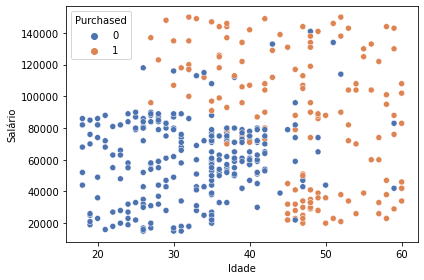

In [64]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=dados, hue='Purchased', palette="deep")
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.tight_layout()

### A coluna User ID é irrelevante para nossa análise, portanto será removida

In [65]:
dados = dados.drop('User ID', axis=1)
dados.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [66]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


### Verificando a existência de NaNs (Not a Numbers)

In [67]:
dados.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Verificando quantos clientes da amostra compraram ou não o SUV

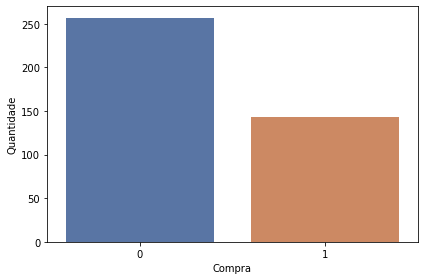

In [68]:
sns.countplot(x='Purchased', data=dados, palette="deep")
plt.xlabel('Compra')
plt.ylabel('Quantidade')
plt.tight_layout()

### Transformando a coluna gênero (Gender) para variável numérica

In [69]:
from sklearn.preprocessing import LabelEncoder as Le
le = Le()
le.fit(dados['Gender'])
list(le.classes_)
dados['Gender'] = le.transform(dados['Gender'])
dados.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


### Normalização dos dados
#### As colunas Age e EstimatedSalary foram transformadas aplicando média e desvio padrão para serem usadas no modelo

In [70]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
dados[['Age', 'EstimatedSalary']] = scx.fit_transform(dados[['Age', 'EstimatedSalary']])
dados.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.781797,-1.490046,0
1,1,-0.253587,-1.460681,0
2,0,-1.113206,-0.785290,0
3,0,-1.017692,-0.374182,0
4,1,-1.781797,0.183751,0


### Separando as variáveis X e Y
#### x = Gender, Age, EstimatedSalary
#### y = Purchased

In [71]:
x = dados[['Gender', 'Age', 'EstimatedSalary']].values
y = dados['Purchased'].values

### Separando os dados em amostras de treino e teste
#### Proporção definida para treino: 70%
#### Proporção definida para teste: 30%

In [72]:
from sklearn.model_selection import train_test_split
xtreino, xteste, ytreino, yteste = train_test_split(x, y, test_size = 0.30, random_state = 0)

### Aplicando o modelo de regressão logística

In [73]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(xtreino, ytreino)

yprevisto = modelo.predict(xteste)

### Plotando Matriz de Confusão
#### A matriz mostra o desempenho do algoritmo de classificação
#### x = predição do modelo y = realidade

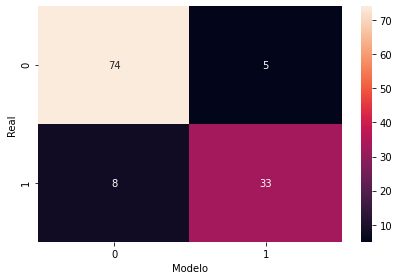

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yteste, yprevisto)

sns.heatmap(cm, annot= True, fmt="d")
plt.xlabel('Modelo')
plt.ylabel('Real')
plt.tight_layout()

### Relatório de desempenho da classificação

In [75]:
from sklearn.metrics import classification_report

cr = classification_report(yteste, yprevisto, labels=[0,1])
print (cr)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        79
           1       0.87      0.80      0.84        41

    accuracy                           0.89       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.89      0.89      0.89       120



### Participantes
* Ulisses Inácio RA: 317201361
* Gabriel Melim RA: 417200698
* Victoria Santos RA: 419203968